<h1>R 스스로 해보기 4</h1>
<h3>2023년 11월 8일 (수)</h3>
<hr>

<h4>1. 데이터 mtcars의 변수 cyl에 대하여 다음과 같이 출력하는 코드</h4>

In [1]:
#a. 빈도표를 변수 result에 저장
result <- table(mtcars$cyl)

#b.b. 변수 result의 이름(names)를 “4기통”, “6기통”, “8기통”으로 변경
names(result) <- paste(names(result), "기통")

#c. 가로합을 구하여 출력
addmargins(result)

4 기통 6 기통 8 기통    Sum 
    11      7     14     32 

<hr>
<h4>2. 위 결과를 다음과 같이 색상의 gold, 경계선은 red로 출력하는 코드</h4>

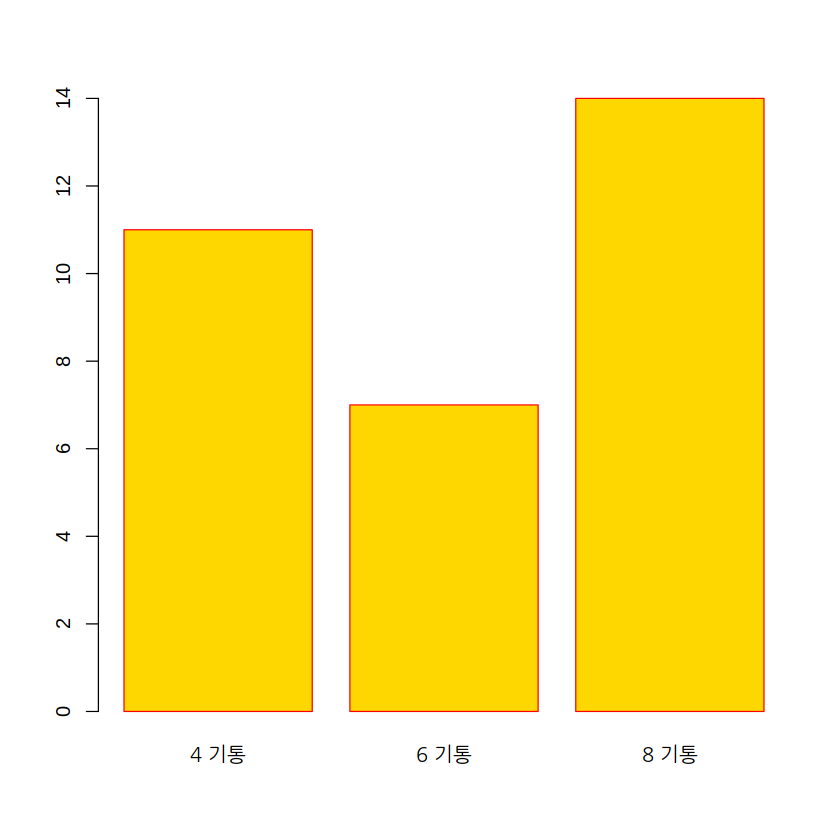

In [2]:
barplot(result, col='gold', border='red')

<hr>
<h4>3. cyl의 수에 따른 mpg의 평균을 구하여 다음과 같이 출력하는 코드</h4>

In [3]:
#a. cyl의 수에 따른 mpg의 평균을 구하여 변수 result에 저장
result <- tapply(mtcars$mpg, mtcars$cyl, mean)

#b. addmargins를 이용하여 전체 평균을 구한후 다시 result에 저장
result <- addmargins(result, FUN = mean)

#c. 결과를 소수점 둘째자리까지만 표시
result <- round(result, 2)

#d. 변수 result의 이름(names)를 다음과 같이 변경하여 출력
names(result) <- c("4기통", "6기통", "8기통", "전체")

print(result)

4기통 6기통 8기통  전체 
26.66 19.74 15.10 20.50 


<hr>
<h4>4. 두 변수 am과 cyl에 대하여 다음과 같이 교차표를 출력하는 코드</h4>

In [4]:
# a. 두 변수의 교차표를 구하여 변수 result에 저장
result <- table(mtcars$am, mtcars$cyl)

# b. 가로합과 세로합을 추가하여 다시 변수 result에 저장
result <- addmargins(result)

# c. 행이름(rownames)과 열이름(colnames)를 다음과 같이 변경하여 출력
rownames(result) <- c("auto", "manual", "전체")
colnames(result) <- c("4기통", "6기통", "8기통", "전체")

result

,4기통,6기통,8기통,전체
auto,3,4,12,19
manual,8,3,2,13
전체,11,7,14,32


<hr>
<h4>5. 두 변수 am과 cyl에 대하여 다음과 같이 mpg의 평균을 구하여 출력하는 코드</h4>

In [5]:
# a. 두 변수 am과 cyl의 각 경우에 대하여 mpg의 평균을 구하여 변수 result에 저장
result <- tapply(mtcars$mpg, list(mtcars$am, mtcars$cyl), mean)

# b. 가로 평균, 세로 평균을 구하여 다시 변수 result에 저장
result <- addmargins(result, FUN = mean)

# c. 행이름과 열이름을 다음과 같이 변경
rownames(result) <- c("auto", "manual", "전체")
colnames(result) <- c("4기통", "6기통", "8기통", "전체")

# d. 결과를 소수점 둘째자리까지만 출력
result <- round(result, 2)

result

Margins computed over dimensions
in the following order:
1: 
2: 


,4기통,6기통,8기통,전체
auto,22.90,19.12,15.05,19.02
manual,28.08,20.57,15.40,21.35
전체,25.49,19.85,15.23,20.19


<hr>
<h4>※ 데이터 파일 “2015년 초미세먼지.xlsx”에 대하여 다음 물음에 답하시오.</h4>
<hr>
<h4>6. 파일의 3개의 시트를 모두 읽어 하나의 변수 mise에 저장하고 구조를 출력하는 코드</h4>

In [6]:
library(readxl)
list.files()

[1] "2015년 초미세먼지.xlsx"                              
[2] "202121059-정보경-exercise-4.ipynb"                   
[3] "202121059-정보경-무작정 따라하기-4.ipynb"            
[4] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx"
[5] "데이터과학-중간고사.xlsx"                            
[6] "실습 설문지.xlsx"

In [7]:
mise1 <- read_xlsx("2015년 초미세먼지.xlsx", sheet = 1)
mise2 <- read_xlsx("2015년 초미세먼지.xlsx", sheet = 2)
mise3 <- read_xlsx("2015년 초미세먼지.xlsx", sheet = 3)
mise <- rbind(mise1, mise2, mise3)
str(mise)

tibble [1,574,914 × 9] (S3: tbl_df/tbl/data.frame)
 $ AREA : chr [1:1574914] "서울" "서울" "서울" "서울" ...
 $ Point: chr [1:1574914] "중구" "중구" "중구" "중구" ...
 $ Date : num [1:1574914] 2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Year : num [1:1574914] 2015 2015 2015 2015 2015 ...
 $ Month: num [1:1574914] 1 1 1 1 1 1 1 1 1 1 ...
 $ Day  : num [1:1574914] 1 1 1 1 1 1 1 1 1 1 ...
 $ Time : num [1:1574914] 0 1 2 3 4 5 6 7 8 9 ...
 $ PM10 : num [1:1574914] 44 57 76 86 106 128 139 132 121 94 ...
 $ PM25 : num [1:1574914] 7 10 10 11 12 18 19 16 14 16 ...


<hr>
<h4>7. 변수 AREA는 “서울”, “경기 부천시”와 같이 서울을 제외하면 모두 광역시도+시군구로
이루어져 있다. 변수 AREA를 각각 광역시도(prov)와 시군구(city)로 분리하여 다음과
같이 두 변수 prov, city를 추가하고, tail(mise)을 출력하는 코드</h4>

In [8]:
mise$prov <- substr(mise$AREA, 1, 2)
mise$city <- substr(mise$AREA, 4, length(mise$AREA))
tail(mise)

AREA,Point,Date,Year,Month,Day,Time,PM10,PM25,prov,city
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
경기 부천시,계남공원,2015073118,2015,7,31,18,NA,NA,경기,부천시
경기 부천시,계남공원,2015073119,2015,7,31,19,NA,NA,경기,부천시
경기 부천시,계남공원,2015073120,2015,7,31,20,NA,NA,경기,부천시
경기 부천시,계남공원,2015073121,2015,7,31,21,NA,NA,경기,부천시
경기 부천시,계남공원,2015073122,2015,7,31,22,NA,NA,경기,부천시
경기 부천시,계남공원,2015073123,2015,7,31,23,NA,NA,경기,부천시


<hr>
<h4>8. prov가 충북인 데이터만 추출하여 변수 cb에 저장하고 Point의 빈도표를 출력하는 코드</h4>

In [9]:
idx <- grep("충북", mise$AREA)
cb <- mise[idx, ]

table(cb$Point)


        매포읍         문화동         복대동         사천동 송정동(봉명동) 
          5088           5080           5052           5088           5076 
        오창읍         용암동         장락동         청천면         칠금동 
          5088           5088           5059           4131           5087 
        호암동 
          5088 

<hr>
<h4>9. 변수 cb에서 city와 Point를 결합하여 Point2에 저장하고 다음과 같이 지정한 변수만 포함하여 head만 출력하는 코드</h4>

In [10]:
cb$Point2 <- paste(cb$city, cb$Point)

head(cb[c("AREA", "prov", "city", "Point", "Point2", "PM10")])

AREA,prov,city,Point,Point2,PM10
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),36
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),47
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),35
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),60
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),81
충북 청주시,충북,청주시,송정동(봉명동),청주시 송정동(봉명동),94


<hr>
<h4>10. 변수 cb에서 Point2의 빈도표를 출력하는 코드</h4>

In [11]:
table(cb$Point2)


        괴산군 청천면         단양군 매포읍         제천시 장락동 
                 4131                  5088                  5059 
        청원군 오창읍         청주시 문화동         청주시 복대동 
                 5088                  5080                  5052 
        청주시 사천동 청주시 송정동(봉명동)         청주시 용암동 
                 5088                  5076                  5088 
        충주시 칠금동         충주시 호암동 
                 5087                  5088 

<hr>
<h4>11. 데이터프레임 cb의 두 변수 PM10, PM25에 대하여 summary() 결과를 출력하는 코드</h4>

In [12]:
result <- cb[c("PM10", "PM25")]
summary(result)

      PM10             PM25       
 Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 32.00   1st Qu.: 14.00  
 Median : 49.00   Median : 26.00  
 Mean   : 57.85   Mean   : 30.04  
 3rd Qu.: 72.00   3rd Qu.: 42.00  
 Max.   :654.00   Max.   :198.00  
 NA's   :3123     NA's   :44154   

<hr>
<h4>12. 데이터프레임 cb에 대하여 측정소(Point2)별 PM10의 평균을 다음과 같이 구하여 출력 하는 코드</h4>

In [13]:
# a. NA를 제외한 측정소별 PM10의 평균을 구하여 변수 result에 저장
result <- tapply(cb$PM10, cb$Point2, mean, na.rm=T)

# b. 결과를 소수점 둘째자리까지만 표시
result <- round(result, 2)

# c. 결과를 행렬 형식으로 변환
result <- as.matrix(result)

# d. 이름(colnames)를 “PM10 평균”으로 지정하고 출력
colnames(result) <- c("PM10 평균")

result

,PM10 평균
괴산군 청천면,54.37
단양군 매포읍,46.41
제천시 장락동,52.06
청원군 오창읍,67.36
청주시 문화동,59.11
청주시 복대동,75.96
청주시 사천동,61.12
청주시 송정동(봉명동),64.86
청주시 용암동,53.09
충주시 칠금동,58.53


<hr>
<h4>13.  데이터프레임 cb의 변수 PM10의 평균을 구하는 코드(결측치 제외)</h4>

In [14]:
# a. PM10의 평균을 구하여 변수 result2에 저장
result2 <- mean(cb$PM10, na.rm=T)

# b. result2의 이름(names)를 “전체”로 지정
names(result2) <- c("전체")

# c. 변수 유형을 matrix로 변환하여 다시 result2에 저장하고 출력
result2 <- as.matrix(result2)

result2

전체,57.84798


<hr>
<h4>14. 위 12, 13번에서 구한 두 변수 result, result2를 rbind를 이용하여 합치고 다음과 같이 소수점 둘째자리까지 출력하는 코드</h4>

In [15]:
new_result = rbind(result, result2)

new_result <- round(new_result, 2)

new_result

,PM10 평균
괴산군 청천면,54.37
단양군 매포읍,46.41
제천시 장락동,52.06
청원군 오창읍,67.36
청주시 문화동,59.11
청주시 복대동,75.96
청주시 사천동,61.12
청주시 송정동(봉명동),64.86
청주시 용암동,53.09
충주시 칠금동,58.53


<hr>
<h4>데이터 파일 “데이터과학-중간고사.xlsx”에 대하여 다음 물음에 답하시오. </h4>
<hr>
<h4>15.  파일에서 sheet=1을 읽어 데이터프레임 data에 저장하고 head를 출력하는 코드</h4>

In [16]:
data <- read_xlsx("데이터과학-중간고사.xlsx", sheet = 1)

head(data)

날짜,광역시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20220101,서울,중구,3,0,0,2,1
20220101,서울,용산구,4,0,1,3,0
20220101,서울,성동구,1,0,1,0,0
20220101,서울,동대문구,2,0,1,1,0
20220101,서울,도봉구,5,0,4,1,0
20220101,서울,은평구,3,0,1,2,0


<hr>
<h4>16. [문제1] 다음과 같이 변수 ‘사고건수’부터 ‘부상신고자수’까지 평균, 최솟값, 최댓값,
중앙값을 구하여 출력하는 코드</h4>

In [17]:
# a. 4개의 변수에 대하여 sapply를 이용하여 평균, 최솟값, 최댓값, 중앙값을 구하여 각각 Mean, Min, Max, Median에 저장
Mean <- round(sapply(data[c(4:8)], mean), 2)
Min <- round(sapply(data[c(4:8)], min), 2)
Max <- round(sapply(data[c(4:8)], max), 2)
Median <- round(sapply(data[c(4:8)], median), 2)

# b. rbind를 이용하여 4개의 결과를 하나로 합쳐 출력
result <- rbind(Mean, Min, Max, Median)

result

,사고건수,사망자수,중상자수,경상자수,부상신고자수
Mean,3.41,0.05,0.9,3.68,0.31
Min,1.00,0.00,0.0,0.00,0.00
Max,32.00,4.00,13.0,64.00,31.00
Median,2.00,0.00,1.0,2.00,0.00


<hr>
<h4>17.  [문제2] 변수 날짜는 년, 월, 일로 분리하여 새로운 변수에 저장하고, 광역시도와 시군구는 합쳐서 지역에 저장하고 head를 출력하는 코드</h4>

In [18]:
data$'년' <- substr(data$'날짜', 1, 4)
data$'월' <- substr(data$'날짜', 5, 6)
data$'일' <- substr(data$'날짜', 7, 8)
data$'지역' <- paste(data$'광역시도', data$'시군구')

head(data)

날짜,광역시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,년,월,일,지역
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
20220101,서울,중구,3,0,0,2,1,2022,01,01,서울 중구
20220101,서울,용산구,4,0,1,3,0,2022,01,01,서울 용산구
20220101,서울,성동구,1,0,1,0,0,2022,01,01,서울 성동구
20220101,서울,동대문구,2,0,1,1,0,2022,01,01,서울 동대문구
20220101,서울,도봉구,5,0,4,1,0,2022,01,01,서울 도봉구
20220101,서울,은평구,3,0,1,2,0,2022,01,01,서울 은평구


<hr>
<h4>18. [문제3] 광역시도별로 사고건수의 합계, 평균, 최솟값, 최댓값을 구하여 출력하는 코드</h4>

In [19]:
# a. tapply를 이용하여 광역시도별 사고건수의 합계, 평균, 최솟값, 최댓값을 구하여 각각 Sum, Mean, Min, Max에 저장
Sum <- tapply(data$'사고건수', data$'광역시도', sum)
Mean <- round(tapply(data$'사고건수', data$'광역시도', mean),1)
Min <- tapply(data$'사고건수', data$'광역시도', min)
Max <- tapply(data$'사고건수', data$'광역시도', max)

# b. cbind를 이용하여 4개의 결과를 하나로 합쳐 출력
result <- cbind(Sum, Mean, Min, Max)

result

,Sum,Mean,Min,Max
강원,6425,2.1,1,14
경기,52968,5.4,1,32
경남,10611,2.7,1,17
경북,11037,2.4,1,16
광주,7122,4.3,1,17
대구,11102,4.1,1,16
대전,6841,4.0,1,16
부산,10882,2.3,1,12
서울,33698,4.0,1,24
세종,932,2.8,1,9


<hr>
<h4>19. 시군구가 ‘강동구’, ‘강서구’, ‘강남구’, ‘강북구’, ‘중구’인 지역만 추출하여 데이터프레임 news에 저장하고, 변수 지역의 빈도표를 출력하는 코드(행렬 형식으로 변환하여 출력)</h4>

In [20]:
news <- subset(data, data$`시군구` %in% c("강동구", "강서구", "강남구", "강북구", "중구"))
news <- table(news$지역)
news <- as.matrix(news)

news

대구 중구,303
대전 중구,332
부산 강서구,303
부산 중구,214
서울 강남구,365
서울 강동구,348
서울 강북구,332
서울 강서구,356
서울 중구,321
울산 중구,292
인천 중구,263


<hr>
<h4>20. [문제4] 위 19번에서 생성된 데이터프레임 news의 지역별x월별 사고건수의 평균을 구하여 출력하는 코드 </h4>

In [21]:
news <- subset(data, data$`시군구` %in% c("강동구", "강서구", "강남구", "강북구", "중구"))
result <- tapply(news$사고건수, list(news$지역, news$월), mean)
result <- round(result,2)

result

,01,02,03,04,05,06,07,08,09,10,11,12
대구 중구,2.38,2.00,1.79,2.88,2.52,2.33,2.68,2.68,2.26,2.30,2.25,2.33
대전 중구,3.15,2.55,2.44,3.52,3.17,3.39,2.90,2.66,3.64,2.72,2.93,3.86
부산 강서구,2.44,2.85,2.04,2.38,2.36,2.85,2.48,2.54,2.76,2.59,2.33,2.73
부산 중구,1.44,1.18,1.50,1.57,2.05,1.44,1.81,2.29,1.67,1.40,1.68,2.00
서울 강남구,10.94,7.89,7.87,10.90,10.29,10.73,11.61,9.90,10.13,11.06,11.03,9.42
서울 강동구,3.89,2.92,3.00,3.10,3.11,3.10,3.48,3.55,3.24,3.61,3.31,3.32
서울 강북구,2.89,3.42,2.38,2.92,3.46,2.77,3.52,3.24,3.10,3.55,3.23,3.14
서울 강서구,4.67,4.30,3.86,4.50,4.97,5.17,4.77,4.20,4.37,4.29,4.17,4.86
서울 중구,2.75,2.57,2.16,2.79,2.88,2.92,3.00,2.44,3.38,3.00,3.41,3.77
울산 중구,2.18,2.05,2.09,1.88,2.00,1.82,1.54,2.22,2.00,2.32,2.17,2.50


<hr>
<h4>21. [문제5] sheet=6에 있는 데이터를 읽어 데이터프레임 data에 저장하고, 장소가 ‘북한산’인 데이터만 추출하여 head를 출력하는 코드</h4>

In [22]:
data <- read_xlsx("데이터과학-중간고사.xlsx", sheet=6)
result <- subset(data, data$장소=='북한산')

head(result)

날짜,장소,PM10,PM25,CO,O3
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
20230301,북한산,29,13,0.3,0.044
20230302,북한산,55,10,0.3,0.042
20230303,북한산,33,12,0.4,0.028
20230304,북한산,77,49,0.4,0.050
20230305,북한산,61,41,0.4,0.054
20230306,북한산,50,31,0.3,0.054


<hr>
<h4>22.  [문제6] 북한산 지역의 미세먼지농도(PM10)에 대하여 다음 표를 구하여 출력하는 코드</h4>

In [23]:
bins <- c(0,30,80,150,300)
result <- cut(result$PM10, breaks=bins)
result <- table(result)

result <- addmargins(result)

result

result
   (0,30]   (30,80]  (80,150] (150,300]       Sum 
        2        25         3         1        31 